In [12]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [9]:
# ! unzip 10_food_classes_10_percent.zip

In [5]:
TRAIN_PATH = "10_food_classes_10_percent/train"
TEST_PATH = "10_food_classes_10_percent/test"

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(TRAIN_PATH,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")
test_data = test_datagen.flow_from_directory(TEST_PATH,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
# popular callbacks-
# tensorboard
# model checkpoint
# early stopping

In [18]:
# tensorboard callback
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
    print(f"Saving tensorboard logs to {log_dir}")
    return tensorboard_callback

In [11]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [13]:
def create_model(model_url, num_classes=10):
    base = hub.KerasLayer(model_url,
                         trainable=False,
                         name="base",
                         input_shape=(224,224,3),)
    model = tf.keras.models.Sequential()
    model.add(base)
    model.add(tf.keras.layers.Dense(10, activation="softmax", name="output_layer"))
    return model

In [14]:
resnet_model = create_model(resnet_url, 10)

In [15]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (KerasLayer)           (None, 2048)              23564800  
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [16]:
resnet_model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

In [19]:
resnet_history = resnet_model.fit(train_data,
                                 epochs=10,
                                 validation_data=test_data,
                                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50V2")])

Saving tensorboard logs to tensorflow_hub/resnet50V2/20230221-181728
Epoch 1/10
24/24 [==============================] - 33s 852ms/step - loss: 2.1734 - accuracy: 0.2813 - val_loss: 1.3269 - val_accuracy: 0.5784
Epoch 2/10
24/24 [==============================] - 17s 744ms/step - loss: 1.0350 - accuracy: 0.6720 - val_loss: 0.9625 - val_accuracy: 0.6820
Epoch 3/10
24/24 [==============================] - 18s 755ms/step - loss: 0.7032 - accuracy: 0.8013 - val_loss: 0.7725 - val_accuracy: 0.7512
Epoch 4/10
24/24 [==============================] - 17s 736ms/step - loss: 0.5228 - accuracy: 0.8533 - val_loss: 0.7206 - val_accuracy: 0.7756
Epoch 5/10
24/24 [==============================] - 25s 1s/step - loss: 0.4164 - accuracy: 0.9040 - val_loss: 0.6914 - val_accuracy: 0.7844
Epoch 6/10
24/24 [==============================] - 25s 1s/step - loss: 0.3471 - accuracy: 0.9187 - val_loss: 0.6642 - val_accuracy: 0.7860
Epoch 7/10
24/24 [==============================] - 18s 795ms/step - loss: 0.28

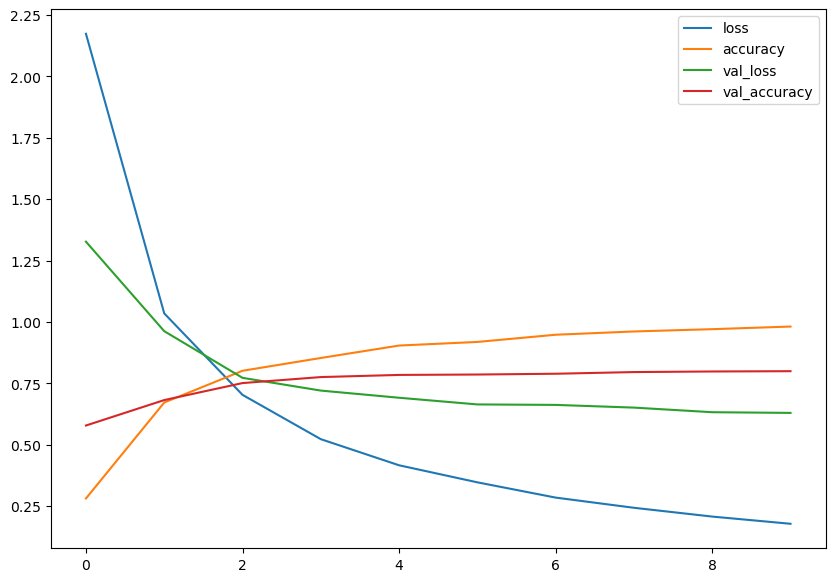

In [20]:
pd.DataFrame(resnet_history.history).plot(figsize=(10,7))
plt.show()